## 1. Title & Introduction : Fake Job Posting Detection in the U.S. Job Market

### Team Members
Porhay Rouen  
MuyKhim Ing

### Problem Statement
Fraudulent job postings are increasingly common in the U.S., targeting job seekers with fake promises, scams, or identity theft. These postings waste applicants’ time, can cause financial loss, and harm the credibility of online job platforms.

This project aims to:
- Examine characteristics of fraudulent postings
- Explore relationships between structured and textual job features
- Prepare features for building predictive models capable of classifying job postings as real or fraudulent

### 2. Import Library


In [170]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Load Dataset

The dataset used in this project contains job postings collected from online platforms, including both legitimate and fraudulent listings.

In [171]:
df = pd.read_csv("../Data/fake_job_postings.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### 4. Store Dataset in SQLite

To enable structured data access and SQL queries, the dataset is stored in a SQLite database.

In [172]:
conn = sqlite3.connect("job_postings.db")

df.to_sql("job_postings", conn, if_exists="replace", index=False)

query = "SELECT * FROM job_postings where fraudulent = 1 LIMIT 5"
pd.read_sql(query, conn)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
1,145,Forward Cap.,None,None,None,None,The group has raised a fund for the purchase o...,None,None,0,0,0,None,None,None,None,None,1
2,174,Technician Instrument & Controls,US,Power Plant & Energy,None,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
3,181,Sales Executive,"PK, SD, Karachi",Sales,None,None,Sales Executive,Sales Executive,Sales Executive,0,0,0,None,None,None,None,Sales,1
4,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


### 5. Data Preprocessing
Data preprocessing prepares the dataset for analysis by cleaning the data, handling missing values, and selecting relevant features.


#### 5.1 Data Cleaning
First we examine missing values in the dataset.

In [173]:
df.isnull().sum().sort_values(ascending=False)

salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

Some columns contain a large number of missing values. To simplify the analysis, selected categorical columns are filled with placeholder values.

In [174]:
df['employment_type'] = df['employment_type'].fillna('Unknown')
df['industry'] = df['industry'].fillna('Unknown')
df['department'] = df['department'].fillna('Unknown')
df['benefits'] = df['benefits'].fillna('None')

Next, we check for duplicate records.

In [175]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [176]:
# Remove duplicates
df_us = df.drop_duplicates()

#### 5.2 Feature Selection

Columns with limited relevance or excessive missing values were removed to simplify the dataset and focus on meaningful attributes.

In [177]:
# df_us = df[
# [
# 'title',
# 'location',
# 'employment_type',
# 'industry',
# 'department',
# 'description',
# 'requirements',
# 'required_education',
# 'fraudulent'
# ]
# ]

df_us = df[
[
'title',
'location',
'employment_type',
'industry',
'department',
'description',
'requirements',
'fraudulent'
]
]

These columns capture key characteristics of job postings and will support both exploratory analysis and future predictive modeling.

#### 5.3 Data Normalization / Preparation
Categorical features are standardized by replacing missing values with consistent labels.

In [178]:
df_us.loc[:, 'employment_type'] = df_us['employment_type'].fillna('Unknown')
df_us.loc[:, 'industry'] = df_us['industry'].fillna('Unknown')
df_us.loc[:, 'department'] = df_us['department'].fillna('Unknown')

### 6. Exploratory Data Analysis (EDA)

Exploratory Data Analysis was conducted to understand the characteristics of the dataset and identify patterns that may distinguish fraudulent job postings from legitimate ones. The analysis includes statistical summaries and visualizations that examine relationships between job attributes and the fraud indicator.

#### 6.1 Basic Dataset Overview

In [179]:
df_us.shape


(17880, 8)

In [180]:
df_us.describe()

,fraudulent
count,17880.000000
mean,0.048434
std,0.214688
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#### 6.2 Distribution of Fraudulent Jobs

In [181]:
df_us['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

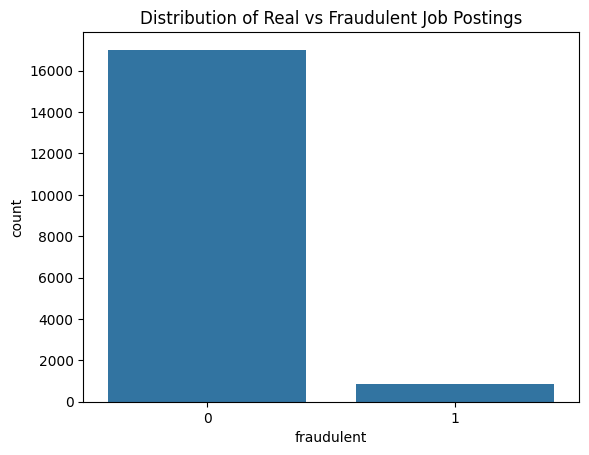

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='fraudulent', data=df_us)
plt.title("Distribution of Real vs Fraudulent Job Postings")
plt.show()

A count plot was used to examine the distribution of the target variable fraudulent. The results show that the dataset is highly imbalanced, with significantly more legitimate job postings (0) than fraudulent ones (1). This imbalance is common in fraud detection problems and may influence the performance of predictive models, as models may become biased toward the majority class.



#### 6.3 Employment Type vs Fraud

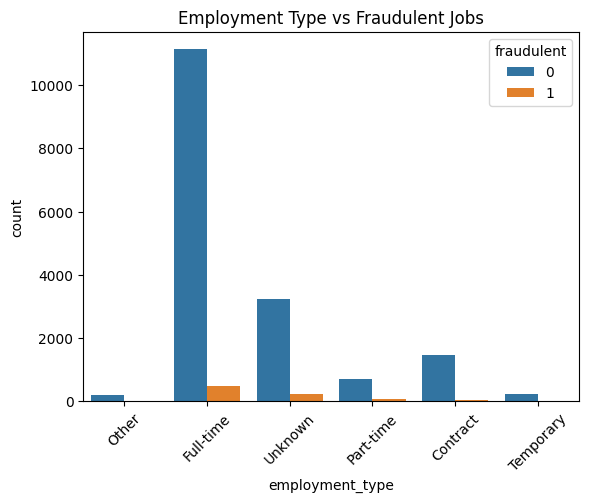

In [183]:
sns.countplot(x='employment_type', hue='fraudulent', data=df_us)
plt.xticks(rotation=45)
plt.title("Employment Type vs Fraudulent Jobs")
plt.show()

Different employment types appear with varying frequencies in fraudulent postings. Some categories show a slightly higher proportion of fraudulent listings.

#### 6.4 Required Education vs Fraud

In [184]:
sns.countplot(x='required_education', hue='fraudulent', data=df_us)
plt.xticks(rotation=90)
plt.title("Required Education vs Fraud")
plt.show()

ValueError: Could not interpret value `required_education` for `x`. An entry with this name does not appear in `data`.

The required_education feature was analyzed to determine whether educational requirements differ between legitimate and fraudulent job postings. The visualization suggests that fraudulent postings often provide vague or missing education requirements, while legitimate postings tend to specify clearer qualifications.

#### 6.5 Correlation Analysis

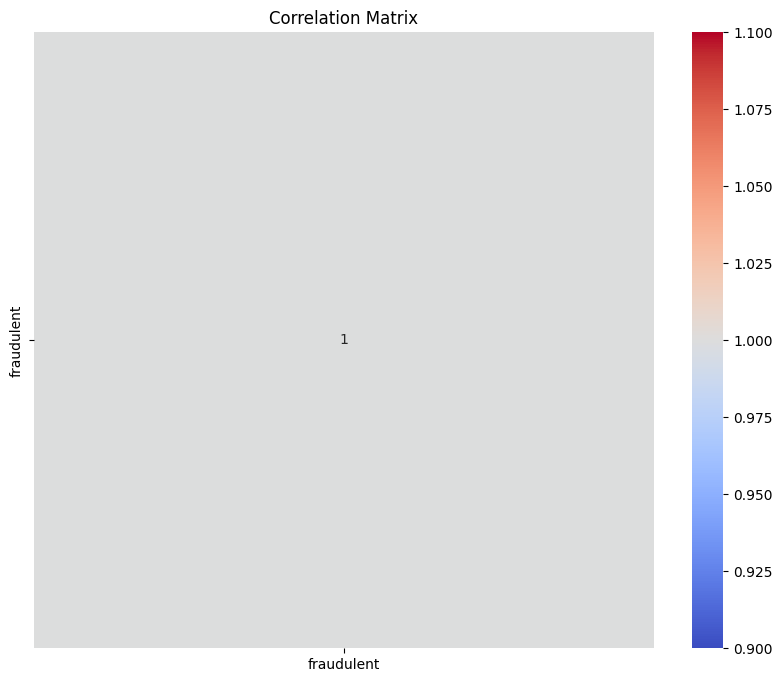

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df_us.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

A correlation heatmap was generated to examine the relationships among numeric variables in the dataset. The analysis shows that some features, such as the presence of a company logo and screening questions, have a slight negative correlation with fraudulent postings. Although the correlations are not strong, these variables may still contribute useful information when building predictive models.

### 7. Preliminary Findings
##### Preliminary Findings

From the exploratory analysis, several patterns emerge:

- Fraudulent job postings often contain less detailed information

- Some industries appear more frequently in fraudulent listings

- Fraud detection datasets are highly imbalanced

- Missing or vague job descriptions may indicate suspicious postings

These insights will guide feature engineering and model development in the next phase.

#### 8. Next Step

The remaining tasks for the project include:

#### Remaining Data Processing

- Additional feature engineering

- Text feature extraction from job descriptions and requirements

#### Modeling

- Build classification models such as:

    - Logistic Regression

    - Random Forest

    - Decision Trees

#### Evaluation

Models will be evaluated using:

- Accuracy

- Precision

- Recall

- F1-score

#### Documentation

- Prepare final report

- Create presentation slides

- Document code and results